In [ ]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
from scipy.stats import mannwhitneyu
import os
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
folder_path = "Data"
os.makedirs(folder_path, exist_ok=True)

print("Folder created at:", folder_path)

Folder created at: /content/data


In [ ]:
#file all file_path csv and merge all csv file
all_files = glob.glob(os.path.join(folder_path, "*.csv"))
df_from_each_file = (pd.read_csv(f) for f in all_files)
tweet_data = pd.concat(df_from_each_file, ignore_index=True)

In [ ]:
all_files

['/content/data/google_tweets.csv',
 '/content/data/trump_tweets.csv',
 '/content/data/tesla_tweets.csv',
 '/content/data/starbucks_tweets.csv',
 '/content/data/fabrizio_tweets.csv',
 '/content/data/wendys_tweets.csv',
 '/content/data/mcdonald_tweets.csv']

In [ ]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   text                             696 non-null    object
 1   edit_history_tweet_ids           696 non-null    object
 2   created_at                       696 non-null    object
 3   id                               696 non-null    int64 
 4   public_metrics.retweet_count     696 non-null    int64 
 5   public_metrics.reply_count       696 non-null    int64 
 6   public_metrics.like_count        696 non-null    int64 
 7   public_metrics.quote_count       696 non-null    int64 
 8   public_metrics.bookmark_count    696 non-null    int64 
 9   public_metrics.impression_count  696 non-null    int64 
 10  likes                            696 non-null    int64 
 11  retweets                         696 non-null    int64 
 12  hour                             696

In [ ]:
tweet_data.head()

,text,edit_history_tweet_ids,created_at,id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,public_metrics.bookmark_count,public_metrics.impression_count,likes,retweets,hour,article.title
0,"@Joshua07943341 Hi Joshua, can you confirm if ...",['1977022115703312700'],2025-10-11 14:42:58+00:00,1977022115703312700,0,2,0,0,0,14,0,0,14,NaN
1,@SajidSayyad1264 Hi Sajid. If they send us a t...,['1977021303413436830'],2025-10-11 14:39:44+00:00,1977021303413436830,0,0,1,0,0,10,1,0,14,NaN
2,"@mehdi_mz5 Hi Mehdi. Just to confirm, have you...",['1977006635454198156'],2025-10-11 13:41:27+00:00,1977006635454198156,0,0,1,0,0,8,1,0,13,NaN
3,@Ashadul4x Hi there. We've sent you a DM with ...,['1977005867640701138'],2025-10-11 13:38:24+00:00,1977005867640701138,0,0,1,0,0,12,1,0,13,NaN
4,@RajeevKuma26110 Got it. We've sent you a DM w...,['1976999931819823154'],2025-10-11 13:14:49+00:00,1976999931819823154,0,0,0,0,0,9,0,0,13,NaN


In [ ]:
#drop article title
tweet_data.drop("article.title", axis=1, inplace=True)

tweet_data.head()

,text,edit_history_tweet_ids,created_at,id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,public_metrics.bookmark_count,public_metrics.impression_count,likes,retweets,hour
0,"@Joshua07943341 Hi Joshua, can you confirm if ...",['1977022115703312700'],2025-10-11 14:42:58+00:00,1977022115703312700,0,2,0,0,0,14,0,0,14
1,@SajidSayyad1264 Hi Sajid. If they send us a t...,['1977021303413436830'],2025-10-11 14:39:44+00:00,1977021303413436830,0,0,1,0,0,10,1,0,14
2,"@mehdi_mz5 Hi Mehdi. Just to confirm, have you...",['1977006635454198156'],2025-10-11 13:41:27+00:00,1977006635454198156,0,0,1,0,0,8,1,0,13
3,@Ashadul4x Hi there. We've sent you a DM with ...,['1977005867640701138'],2025-10-11 13:38:24+00:00,1977005867640701138,0,0,1,0,0,12,1,0,13
4,@RajeevKuma26110 Got it. We've sent you a DM w...,['1976999931819823154'],2025-10-11 13:14:49+00:00,1976999931819823154,0,0,0,0,0,9,0,0,13


In [ ]:
tweet_data.rename(columns={'hour': 'posting_time'}, inplace=True)
tweet_data.drop(columns=['likes', 'retweets'], inplace = True)

In [ ]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   text                             696 non-null    object
 1   edit_history_tweet_ids           696 non-null    object
 2   created_at                       696 non-null    object
 3   id                               696 non-null    int64 
 4   public_metrics.retweet_count     696 non-null    int64 
 5   public_metrics.reply_count       696 non-null    int64 
 6   public_metrics.like_count        696 non-null    int64 
 7   public_metrics.quote_count       696 non-null    int64 
 8   public_metrics.bookmark_count    696 non-null    int64 
 9   public_metrics.impression_count  696 non-null    int64 
 10  posting_time                     696 non-null    int64 
dtypes: int64(8), object(3)
memory usage: 59.9+ KB


### 🧩 Research Question
**How does the posting time (hour of the day) affect the engagement of tweets?**

### 🧪 Hypothesis

- **Null Hypothesis (H₀):**  
  The posting time (hour of the day) has no significant effect on tweet engagement.

- **Alternative Hypothesis (H₁):**  
  The posting time (hour of the day) significantly improve tweet engagement.

### 🎯 Variables
- **Independent Variable:** Posting time (hour of the day)
- **Dependent Variables:** Engagement rates: total engagement / impression

### Test Method
Since there are four time groups (Morning, Afternoon, Evening, Night) and the engagement rate is right-skewed, the Kruskal–Wallis test will be used to determine if there are statistically significant differences in engagement between the time groups.


In [ ]:
tweet_data[tweet_data['public_metrics.impression_count'] == 0]

,text,edit_history_tweet_ids,created_at,id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,public_metrics.bookmark_count,public_metrics.impression_count,posting_time
407,RT @gamdomsport: ❌ Eze\n❌ Zubimendi\n❌ Foden\n...,['1969802017146298454'],2025-09-21 16:32:52+00:00,1969802017146298454,209,0,0,0,0,0,16
436,"RT @FabrizioRomano: 🚨🇦🇷 Lionel Messi, closing ...",['1969171151801762111'],2025-09-19 22:46:02+00:00,1969171151801762111,2405,0,0,0,0,0,22


In [ ]:
tweet_data['posting_time'].describe()

,posting_time
count,696.000000
mean,11.045977
std,7.211754
min,0.000000
25%,4.000000
50%,11.500000
75%,17.000000
max,23.000000


In [ ]:
# Group posting_time
def categorize_hour(hour):
    if 5 <= hour <= 11:
        return 'Morning'
    elif 12 <= hour <= 17:
        return 'Afternoon'
    elif 18 <= hour <= 22:
        return 'Evening'
    else:
        return 'Night'

tweet_data['hour_group'] = tweet_data['posting_time'].apply(categorize_hour)


In [ ]:
# remove impression_count = 0
tweet_data = tweet_data[tweet_data['public_metrics.impression_count'] > 0]

# Calculate engagement_rate
tweet_data['engagement_rate'] = (
    (tweet_data['public_metrics.reply_count'] +
     tweet_data['public_metrics.retweet_count'] +
     tweet_data['public_metrics.like_count'] +
     tweet_data['public_metrics.quote_count'] +
     tweet_data['public_metrics.bookmark_count'])
    / tweet_data['public_metrics.impression_count']
)

### Basic_Statistics

In [ ]:
tweet_data['engagement_rate'].describe()


,engagement_rate
count,694.000000
mean,4.436964
std,63.603898
min,0.000000
25%,0.003927
50%,0.009037
75%,0.023003
max,1512.111111


<Axes: xlabel='engagement_rate', ylabel='Density'>

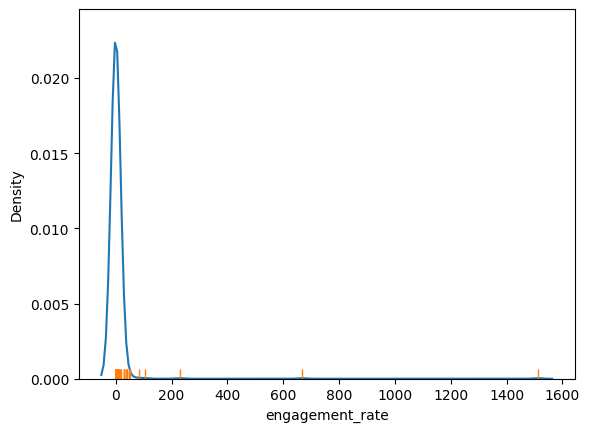

In [ ]:
sns.kdeplot(tweet_data['engagement_rate'])
sns.rugplot(tweet_data['engagement_rate'])

<Axes: xlabel='hour_group', ylabel='engagement_rate'>

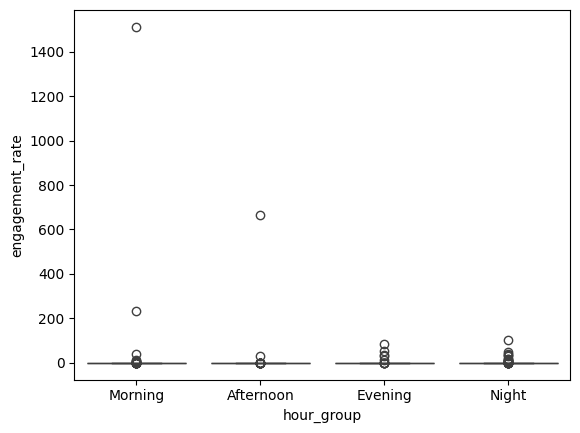

In [ ]:
sns.boxplot(x='hour_group', y='engagement_rate', data=tweet_data, order=['Morning','Afternoon','Evening','Night'])

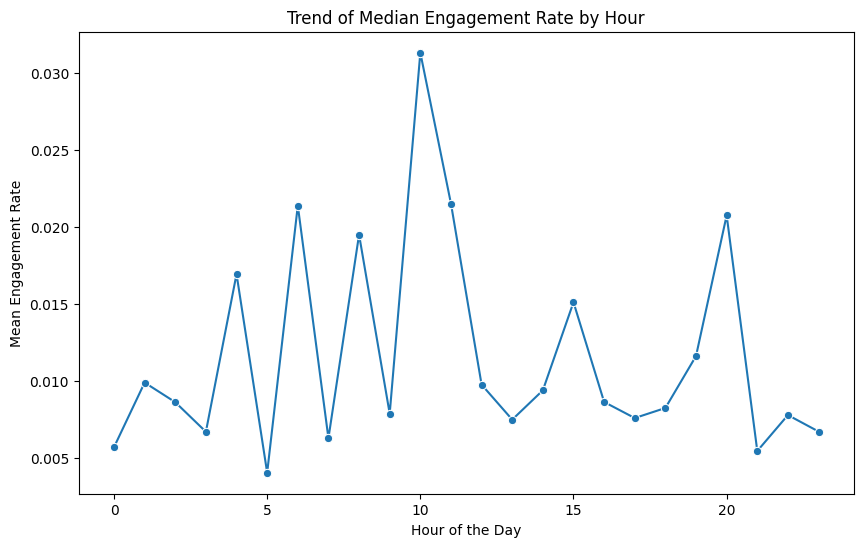

In [ ]:
# Line plot see trend
hourly_median = tweet_data.groupby('posting_time')['engagement_rate'].median().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(x='posting_time', y='engagement_rate', data=hourly_median, marker='o')
plt.title('Trend of Median Engagement Rate by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Mean Engagement Rate')
plt.show()

###Outlier Handling:
Since engagement metrics from Twitter can occasionally exhibit extreme spikes due to viral tweets, we removed outliers to focus on typical user engagement behavior under normal posting conditions.
Outliers were identified and removed within each time-of-day group using the IQR method (1.5 × IQR rule).

In [ ]:
def remove_outliers_by_group(df, group_col, value_col):
    cleaned_df = pd.DataFrame()

    for group, data in df.groupby(group_col):
        Q1 = data[value_col].quantile(0.25)
        Q3 = data[value_col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        filtered = data[(data[value_col] >= lower_bound) & (data[value_col] <= upper_bound)]
        cleaned_df = pd.concat([cleaned_df, filtered])

    return cleaned_df
tweet_clean = remove_outliers_by_group(tweet_data, 'hour_group', 'engagement_rate')

print("Before:", len(tweet_data))
print("After:", len(tweet_clean))


Before: 694
After: 619


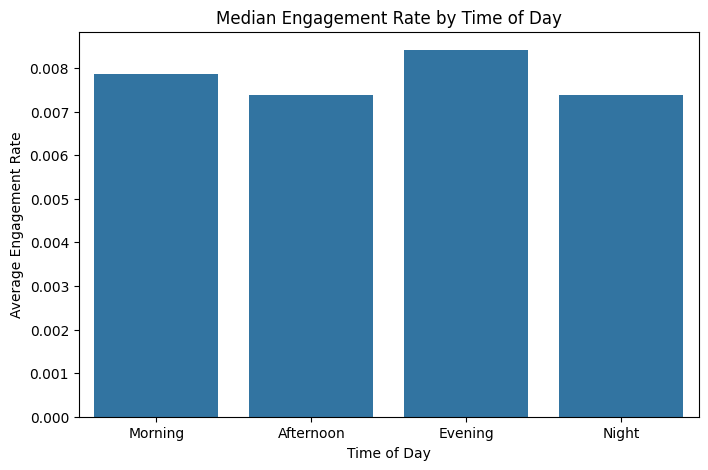

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='hour_group', y='engagement_rate', data=tweet_clean, ci=None,estimator = np.median,
            order=['Morning','Afternoon','Evening','Night'])
plt.title('Median Engagement Rate by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Engagement Rate')
plt.show()

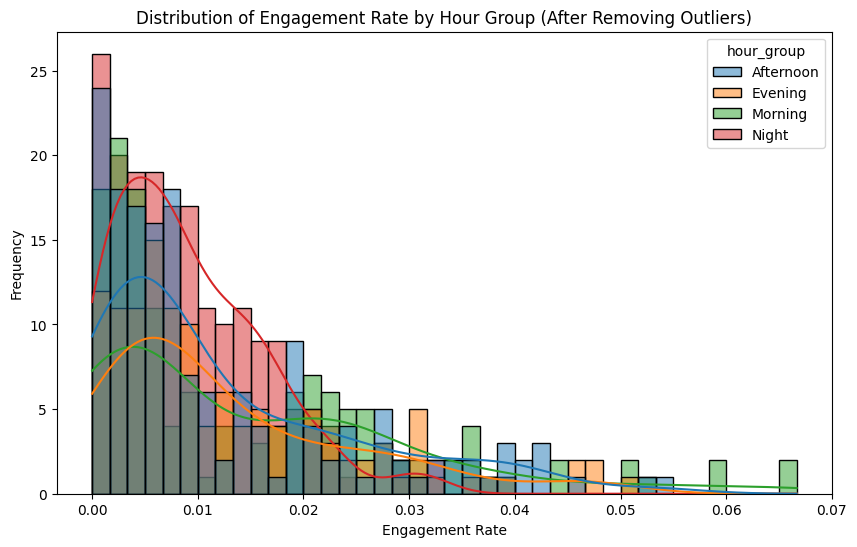

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=tweet_clean, x='engagement_rate', hue='hour_group', kde=True, bins=40)
plt.title('Distribution of Engagement Rate by Hour Group (After Removing Outliers)')
plt.xlabel('Engagement Rate')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# After remove outliers and check skewness again --> distribution each goups is not normal --> we use Kruskal–Wallis test(non-parametric tests)

tweet_clean['log_engagement'] = np.log1p(tweet_clean['engagement_rate'])
skew_compare = tweet_clean.groupby('hour_group').agg(
    original_skew=('engagement_rate', 'skew'),
    log_skew=('log_engagement', 'skew')
).reset_index()

print(skew_compare)


  hour_group  original_skew  log_skew
0  Afternoon       1.292876  1.270862
1    Evening       1.283973  1.259993
2    Morning       1.358648  1.320552
3      Night       0.967488  0.949055


In [ ]:
from scipy.stats import kruskal

stat, p = kruskal(
    *[group['engagement_rate'].values for name, group in tweet_data.groupby('hour_group')]
)
print(f"Kruskal-Wallis test: H={stat:.3f}, p={p:.4f}")

alpha = 0.05
if p < alpha:
    print("✅ Since p-value < 0.05, we reject the null hypothesis.")
    print("➡️ There is a statistically significant difference in tweet engagement across posting time groups.")
else:
    print("❌ Since p-value ≥ 0.05, we fail to reject the null hypothesis.")
    print("➡️ There is no statistically significant difference in tweet engagement across posting time groups.")


Kruskal-Wallis test: H=5.631, p=0.1310
❌ Since p-value ≥ 0.05, we fail to reject the null hypothesis.
➡️ There is no statistically significant difference in tweet engagement across posting time groups.


### Research Question
How does the number of bookmarks affect the number of likes on tweets?

### Null Hypothesis (H₀)
There is no significant difference in the number of likes between tweets with higher and lower bookmark counts.

### Alternative Hypothesis (H₁)
Tweets with higher bookmark counts have significantly more likes than those with lower bookmark counts.

### Test Method
A two-sample t-test (or Mann–Whitney U test if data is non-normal) will be used to compare the mean number of likes between the two groups.

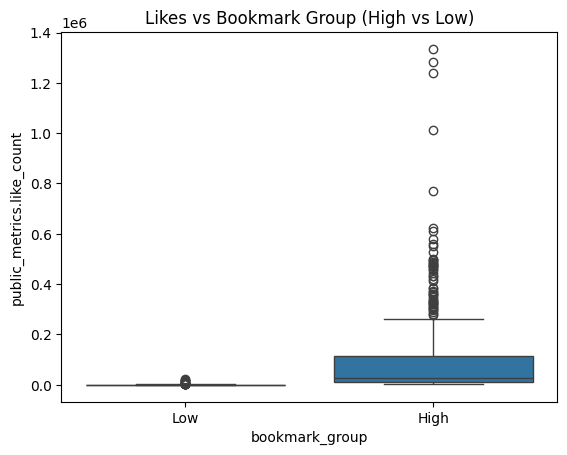

In [ ]:
# 1️⃣ Divide high vs low bookmarks according to median
median_bookmarks = tweet_data['public_metrics.bookmark_count'].median()
tweet_clean['bookmark_group'] = np.where(
    tweet_clean['public_metrics.bookmark_count'] >= median_bookmarks, 'High', 'Low'
)

# 2️⃣ Draw box_plot
sns.boxplot(data=tweet_clean, x='bookmark_group', y='public_metrics.like_count')
plt.title("Likes vs Bookmark Group (High vs Low)")
plt.show()

In [ ]:
#  3️⃣ (Mann–Whitney U test)
high = tweet_clean[tweet_clean['bookmark_group'] == 'High']['public_metrics.like_count']
low = tweet_clean[tweet_clean['bookmark_group'] == 'Low']['public_metrics.like_count']

stat, p = mannwhitneyu(high, low, alternative='greater')

print(f"Mann–Whitney U statistic: {stat:.4f}, p-value: {p:.4e}")

if p < 0.05:
    print("✅ Tweets with higher bookmarks tend to have more likes (significant difference).")
else:
    print("❌ No significant difference in likes between high and low bookmark groups.")

Mann–Whitney U statistic: 93334.0000, p-value: 4.2782e-97
✅ Tweets with higher bookmarks tend to have more likes (significant difference).


Hypothesis: Longing tweet receive more likes and retweet than shorter ones.